In [139]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300
B = 5
G = 5

import pandas as pd
import matplotlib.pyplot as plt
import glob

In [140]:
plt.rcParams.update({
    "font.size": 14,            # Default text size
    "axes.titlesize": 18,       # Title size
    "axes.labelsize": 14,       # X and Y label size
    "xtick.labelsize": 12,      # X-axis tick size
    "ytick.labelsize": 12,      # Y-axis tick size
    "legend.fontsize": 14,      # Legend font size
    "figure.titlesize": 18,     # Figure title size
    "lines.linewidth": 2.5
})

In [166]:
column_mapping = {
        "solveMILP": "MILP",
        "solveConicGibbsGreedyDynamic": "Greedy Dynamic",
        # "PPO_4Bucket_20000000": "PPO 4",
        # "PPO_4Bucket_50000000": "PPO 4+",
        # "PPO_5Bucket_20000000" : "PPO 5",
        # "PPO_5Bucket_50000000": "PPO 5+"
    }

columns_to_plot = list(column_mapping.values())

# Define parameters
base_path = "data/types/"

# Load data
dfs = []
B_values = range(1, 6)
for B in B_values:
    file_path = f"{base_path}sample_N50_d2_B{B}_G{G}_Utils3.csv"
    df = pd.read_csv(file_path)
    df = df.rename(columns=column_mapping)
    df["B"] = B  # Track B value
    dfs.append(df)


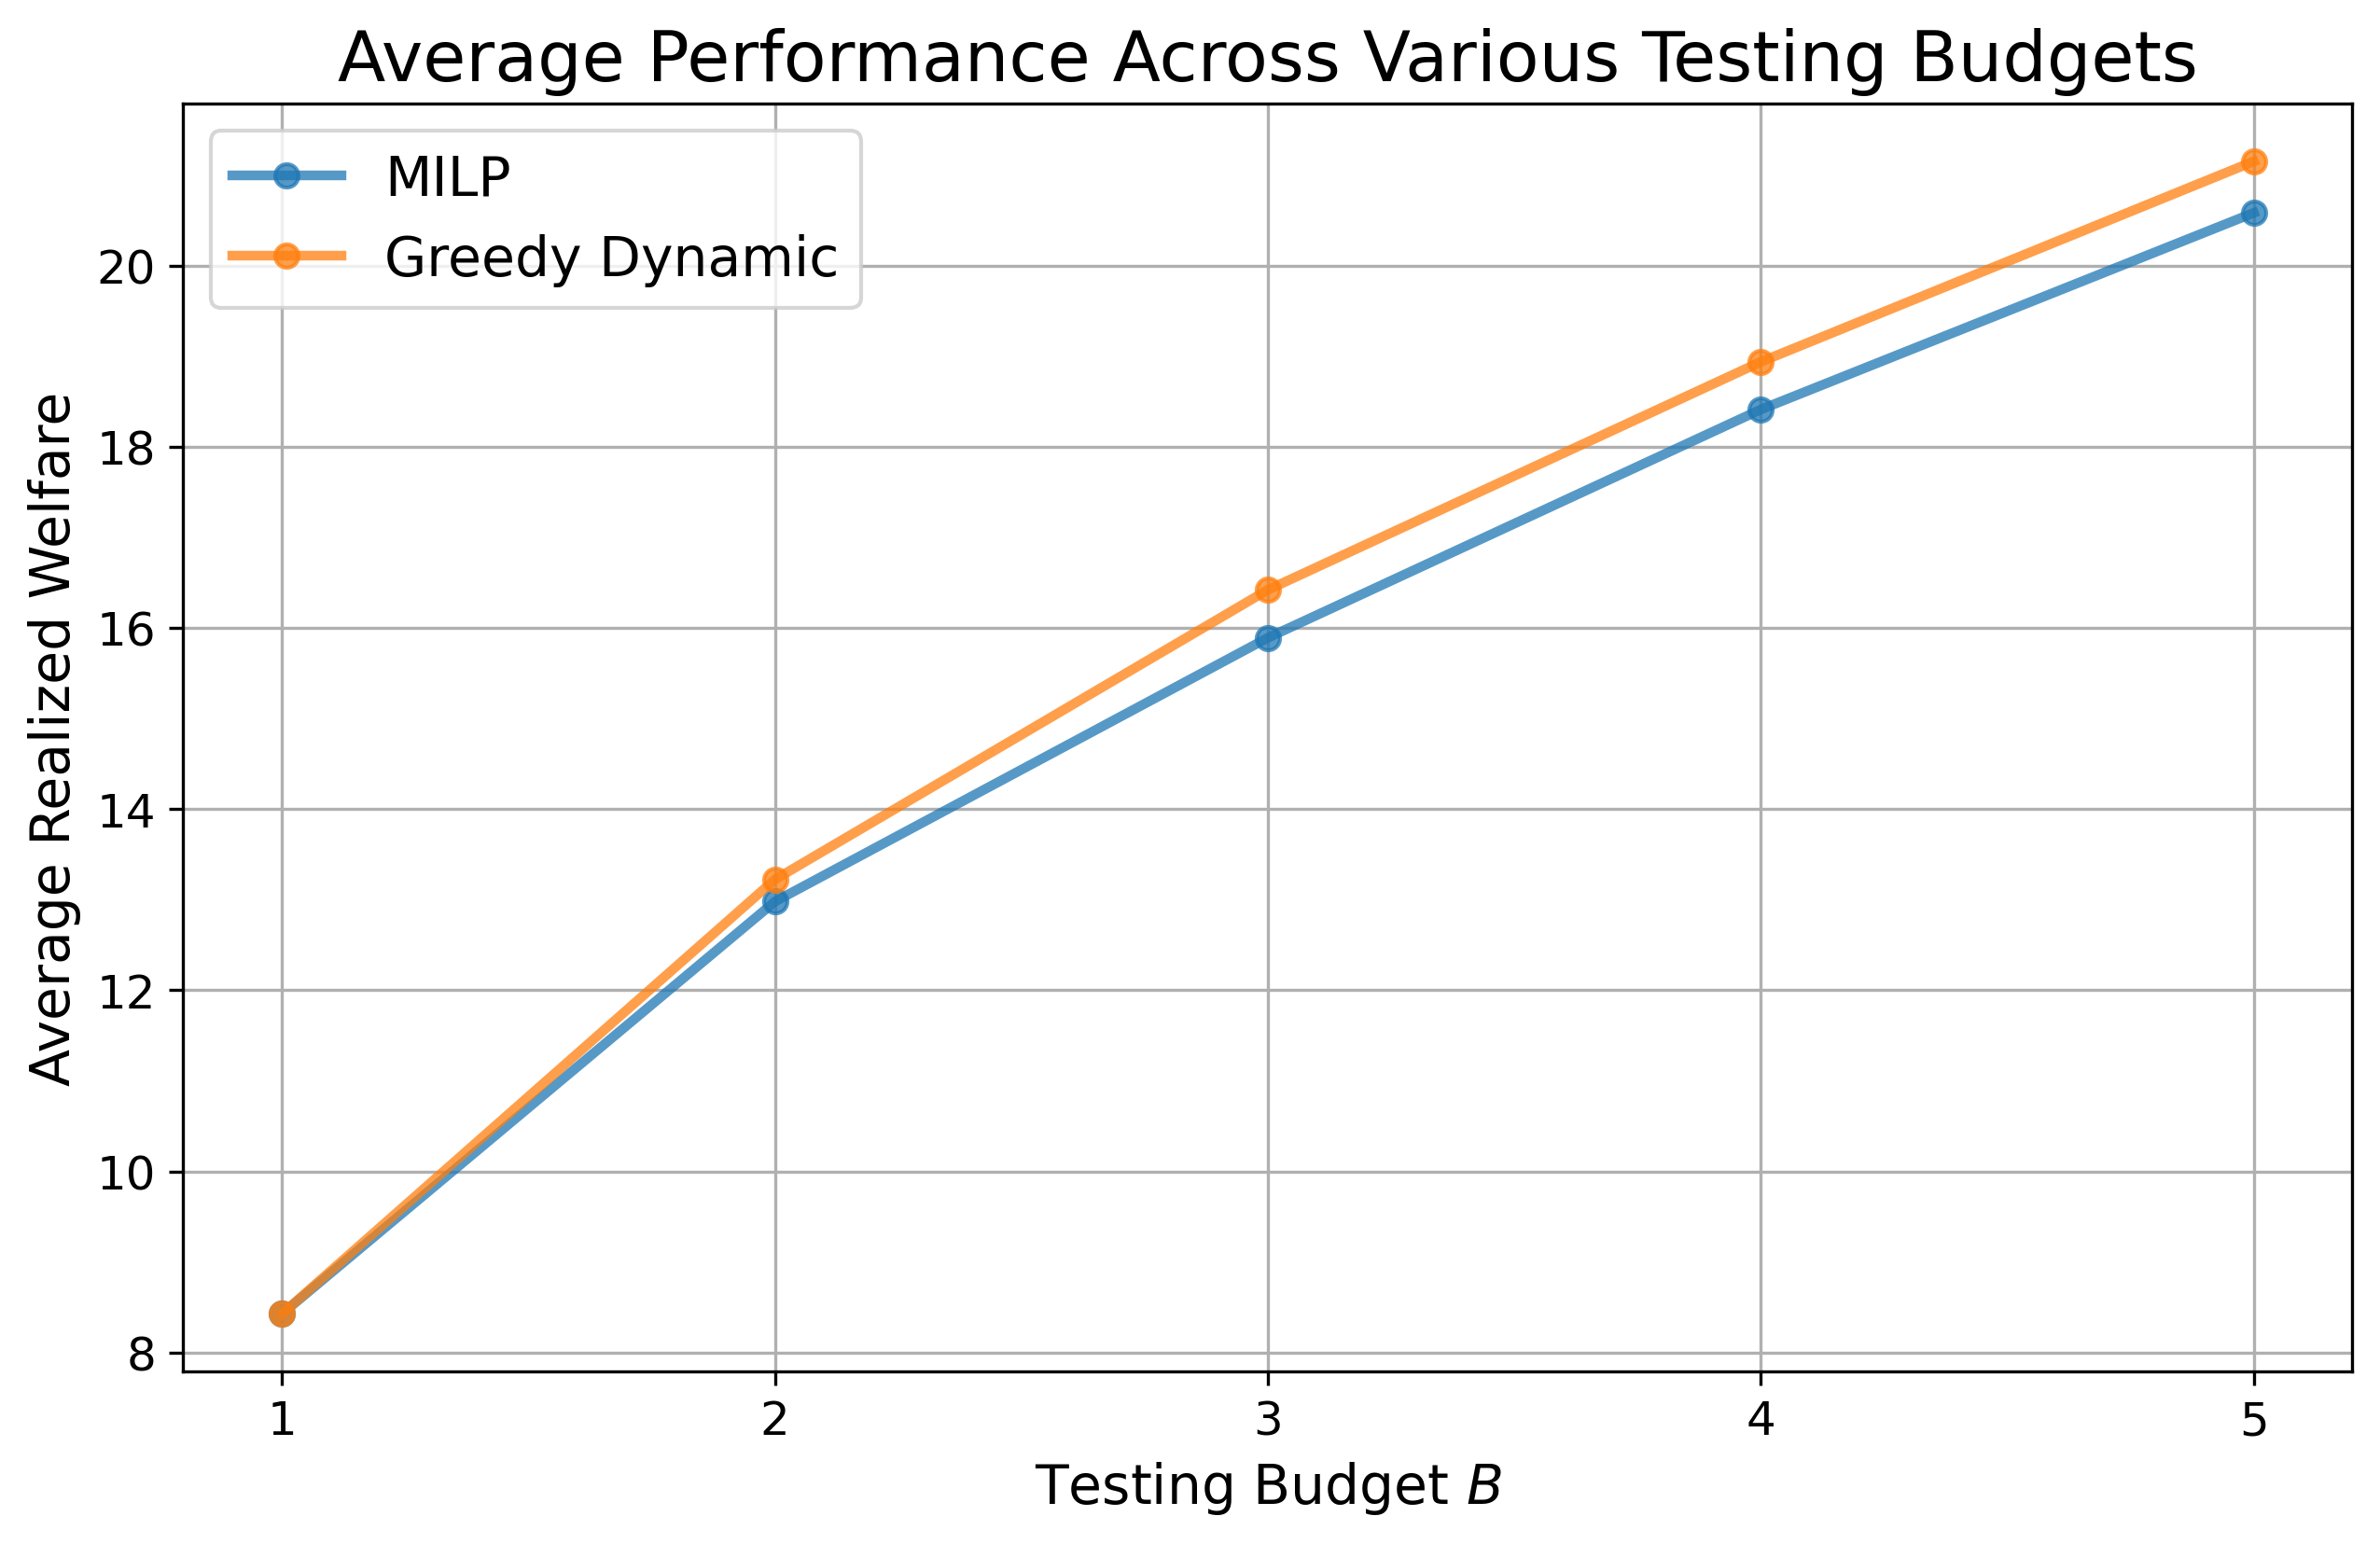

In [146]:
# Combine data
combined_df = pd.concat(dfs, ignore_index=True)

# Compute mean for each B
mean_df = combined_df.groupby("B")[columns_to_plot].mean()

# Plot results
plt.figure(figsize=(10, 6))
for col in columns_to_plot:
    plt.plot(mean_df.index, mean_df[col], marker='o', alpha=0.75,
     label=col)

plt.xticks(B_values)
plt.xlabel("Testing Budget $B$")
plt.ylabel("Average Realized Welfare")
plt.title("Average Performance Across Various Testing Budgets")
plt.legend()
plt.grid()
plt.show()


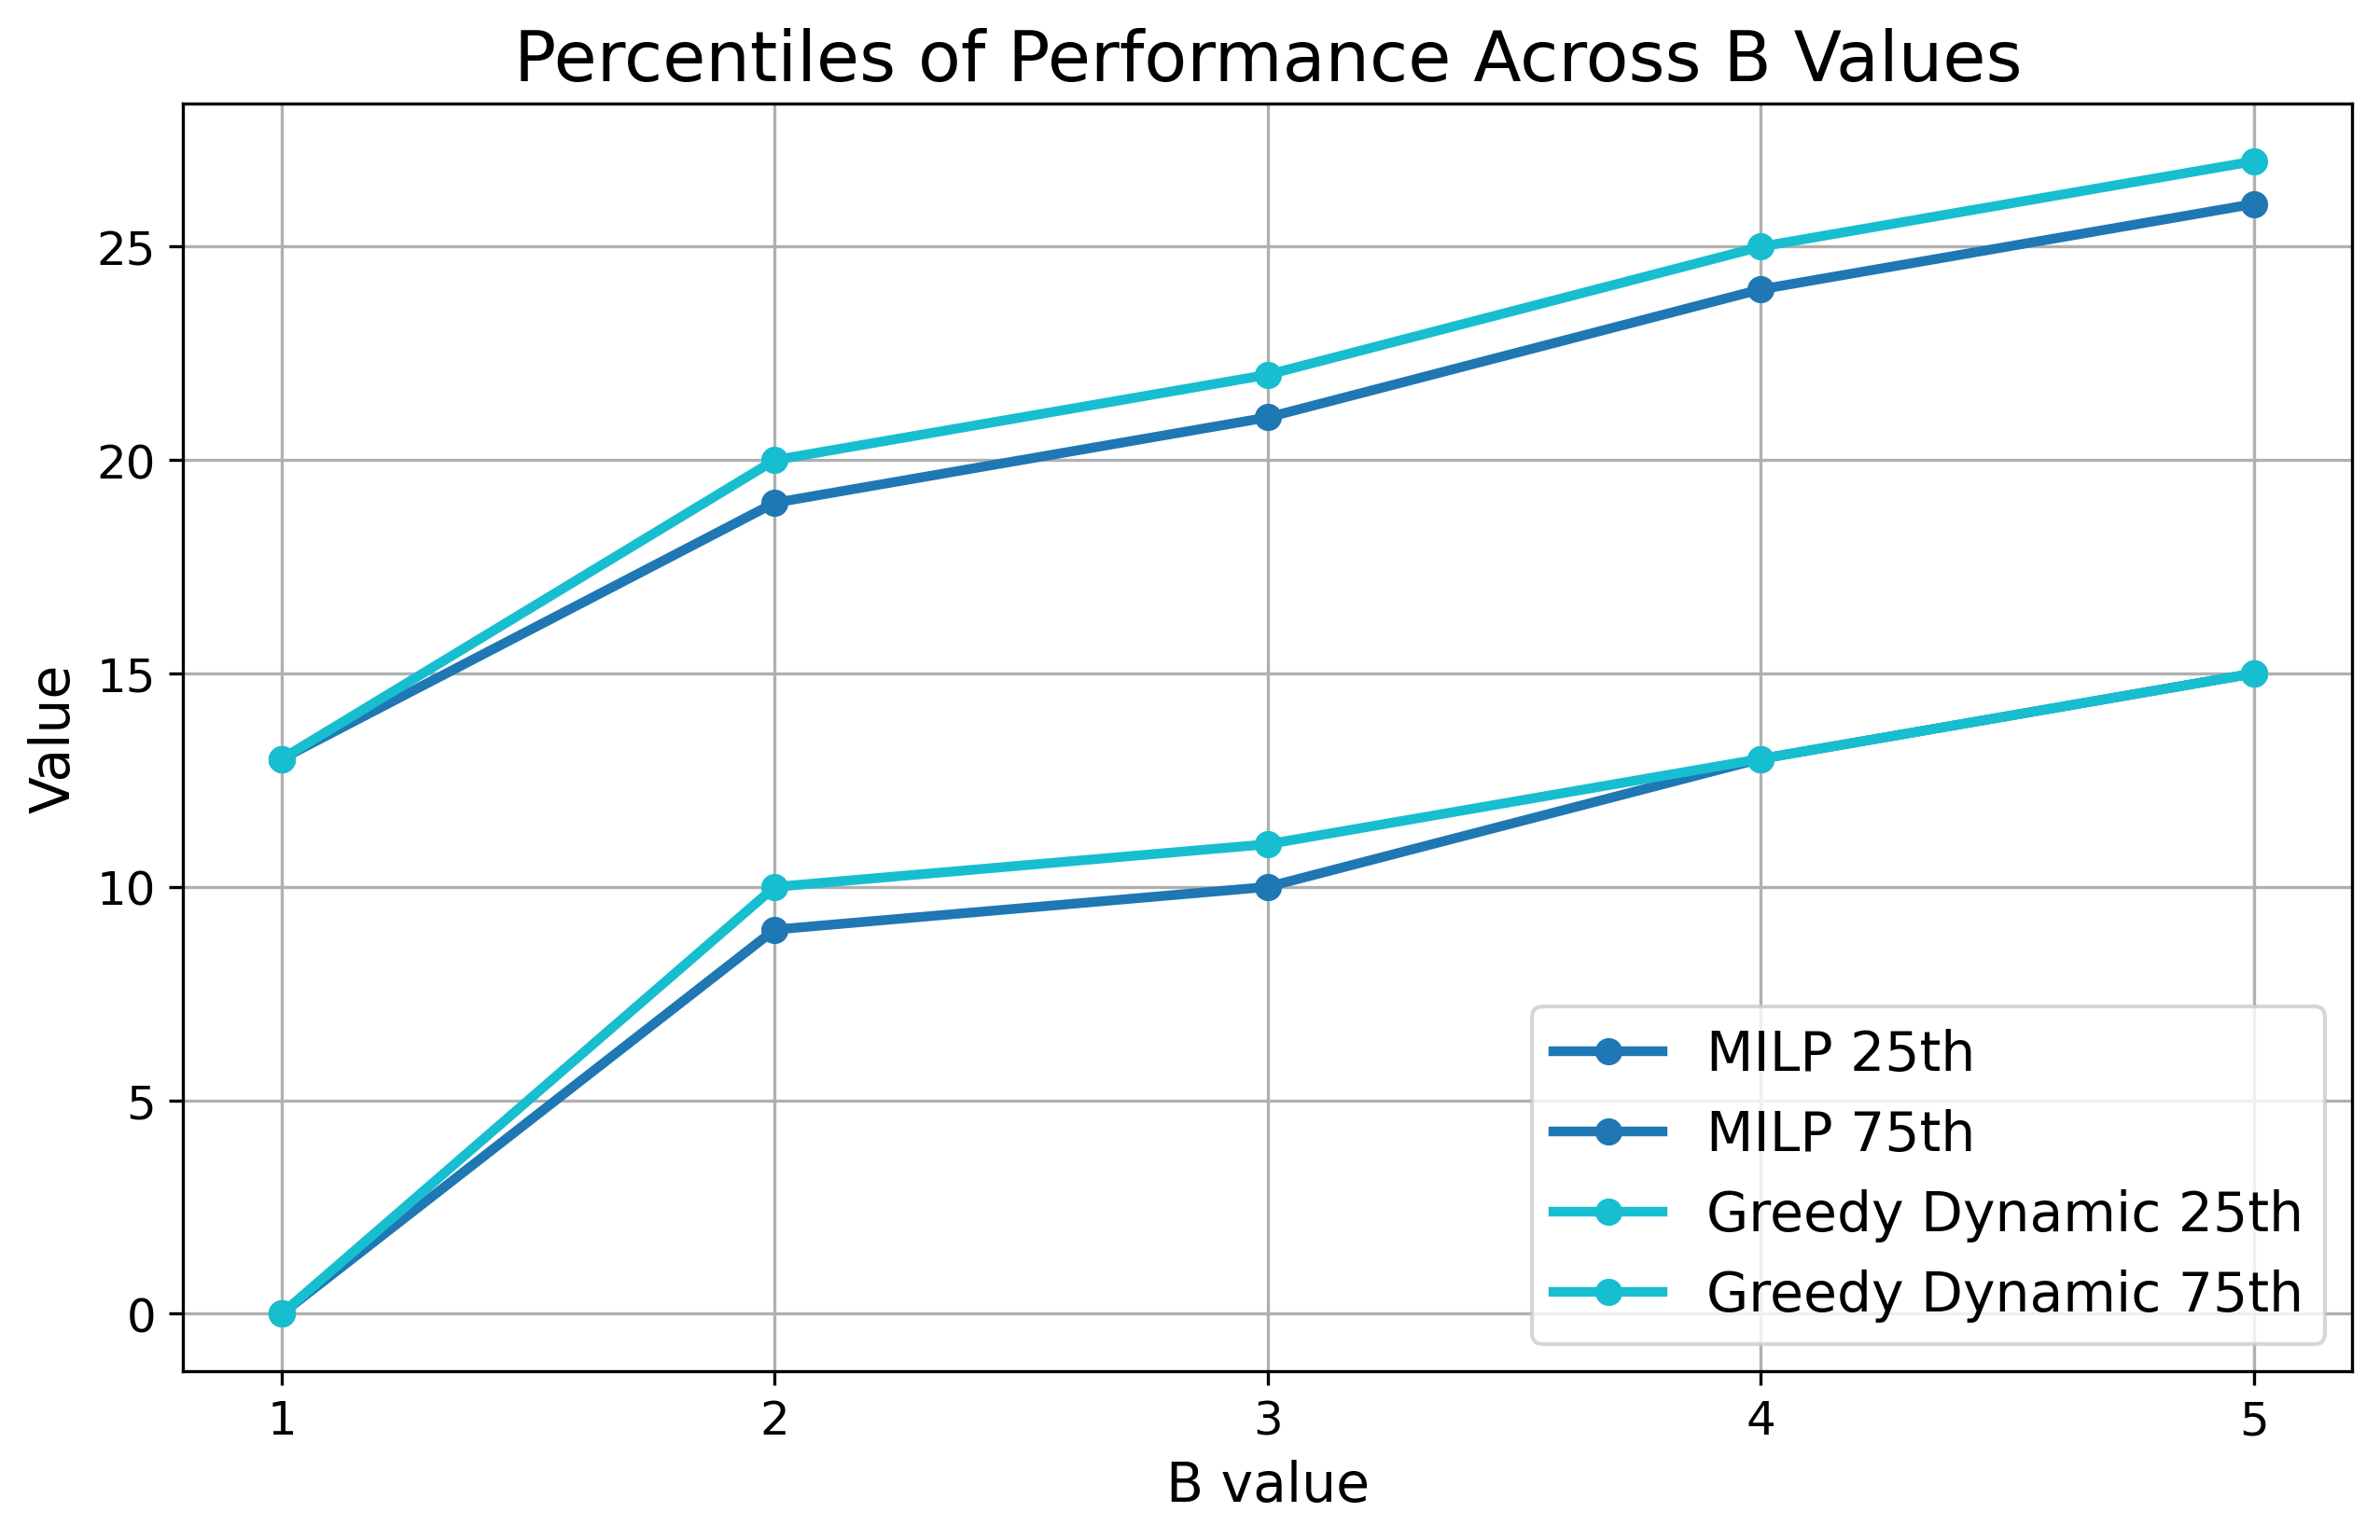

In [147]:
percentiles = [25,75] # Define desired percentiles

# Combine data
combined_df = pd.concat(dfs, ignore_index=True)

# Compute percentiles for each B
percentile_dfs = {p: combined_df.groupby("B")[columns_to_plot].quantile(p / 100) for p in percentiles}

# Plot results
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap("tab10", len(columns_to_plot))  # Assign colors to methods

for idx, col in enumerate(columns_to_plot):
    color = colors(idx)  # Same color for each method across percentiles
    for p in percentiles:
        plt.plot(percentile_dfs[p].index, percentile_dfs[p][col], marker='o', linestyle='-', color=color, label=f"{col} {p}th")
plt.xticks(B_values)
plt.xlabel("B value")
plt.ylabel("Value")
plt.title("Percentiles of Performance Across B Values")
plt.legend()
plt.grid()
plt.show()


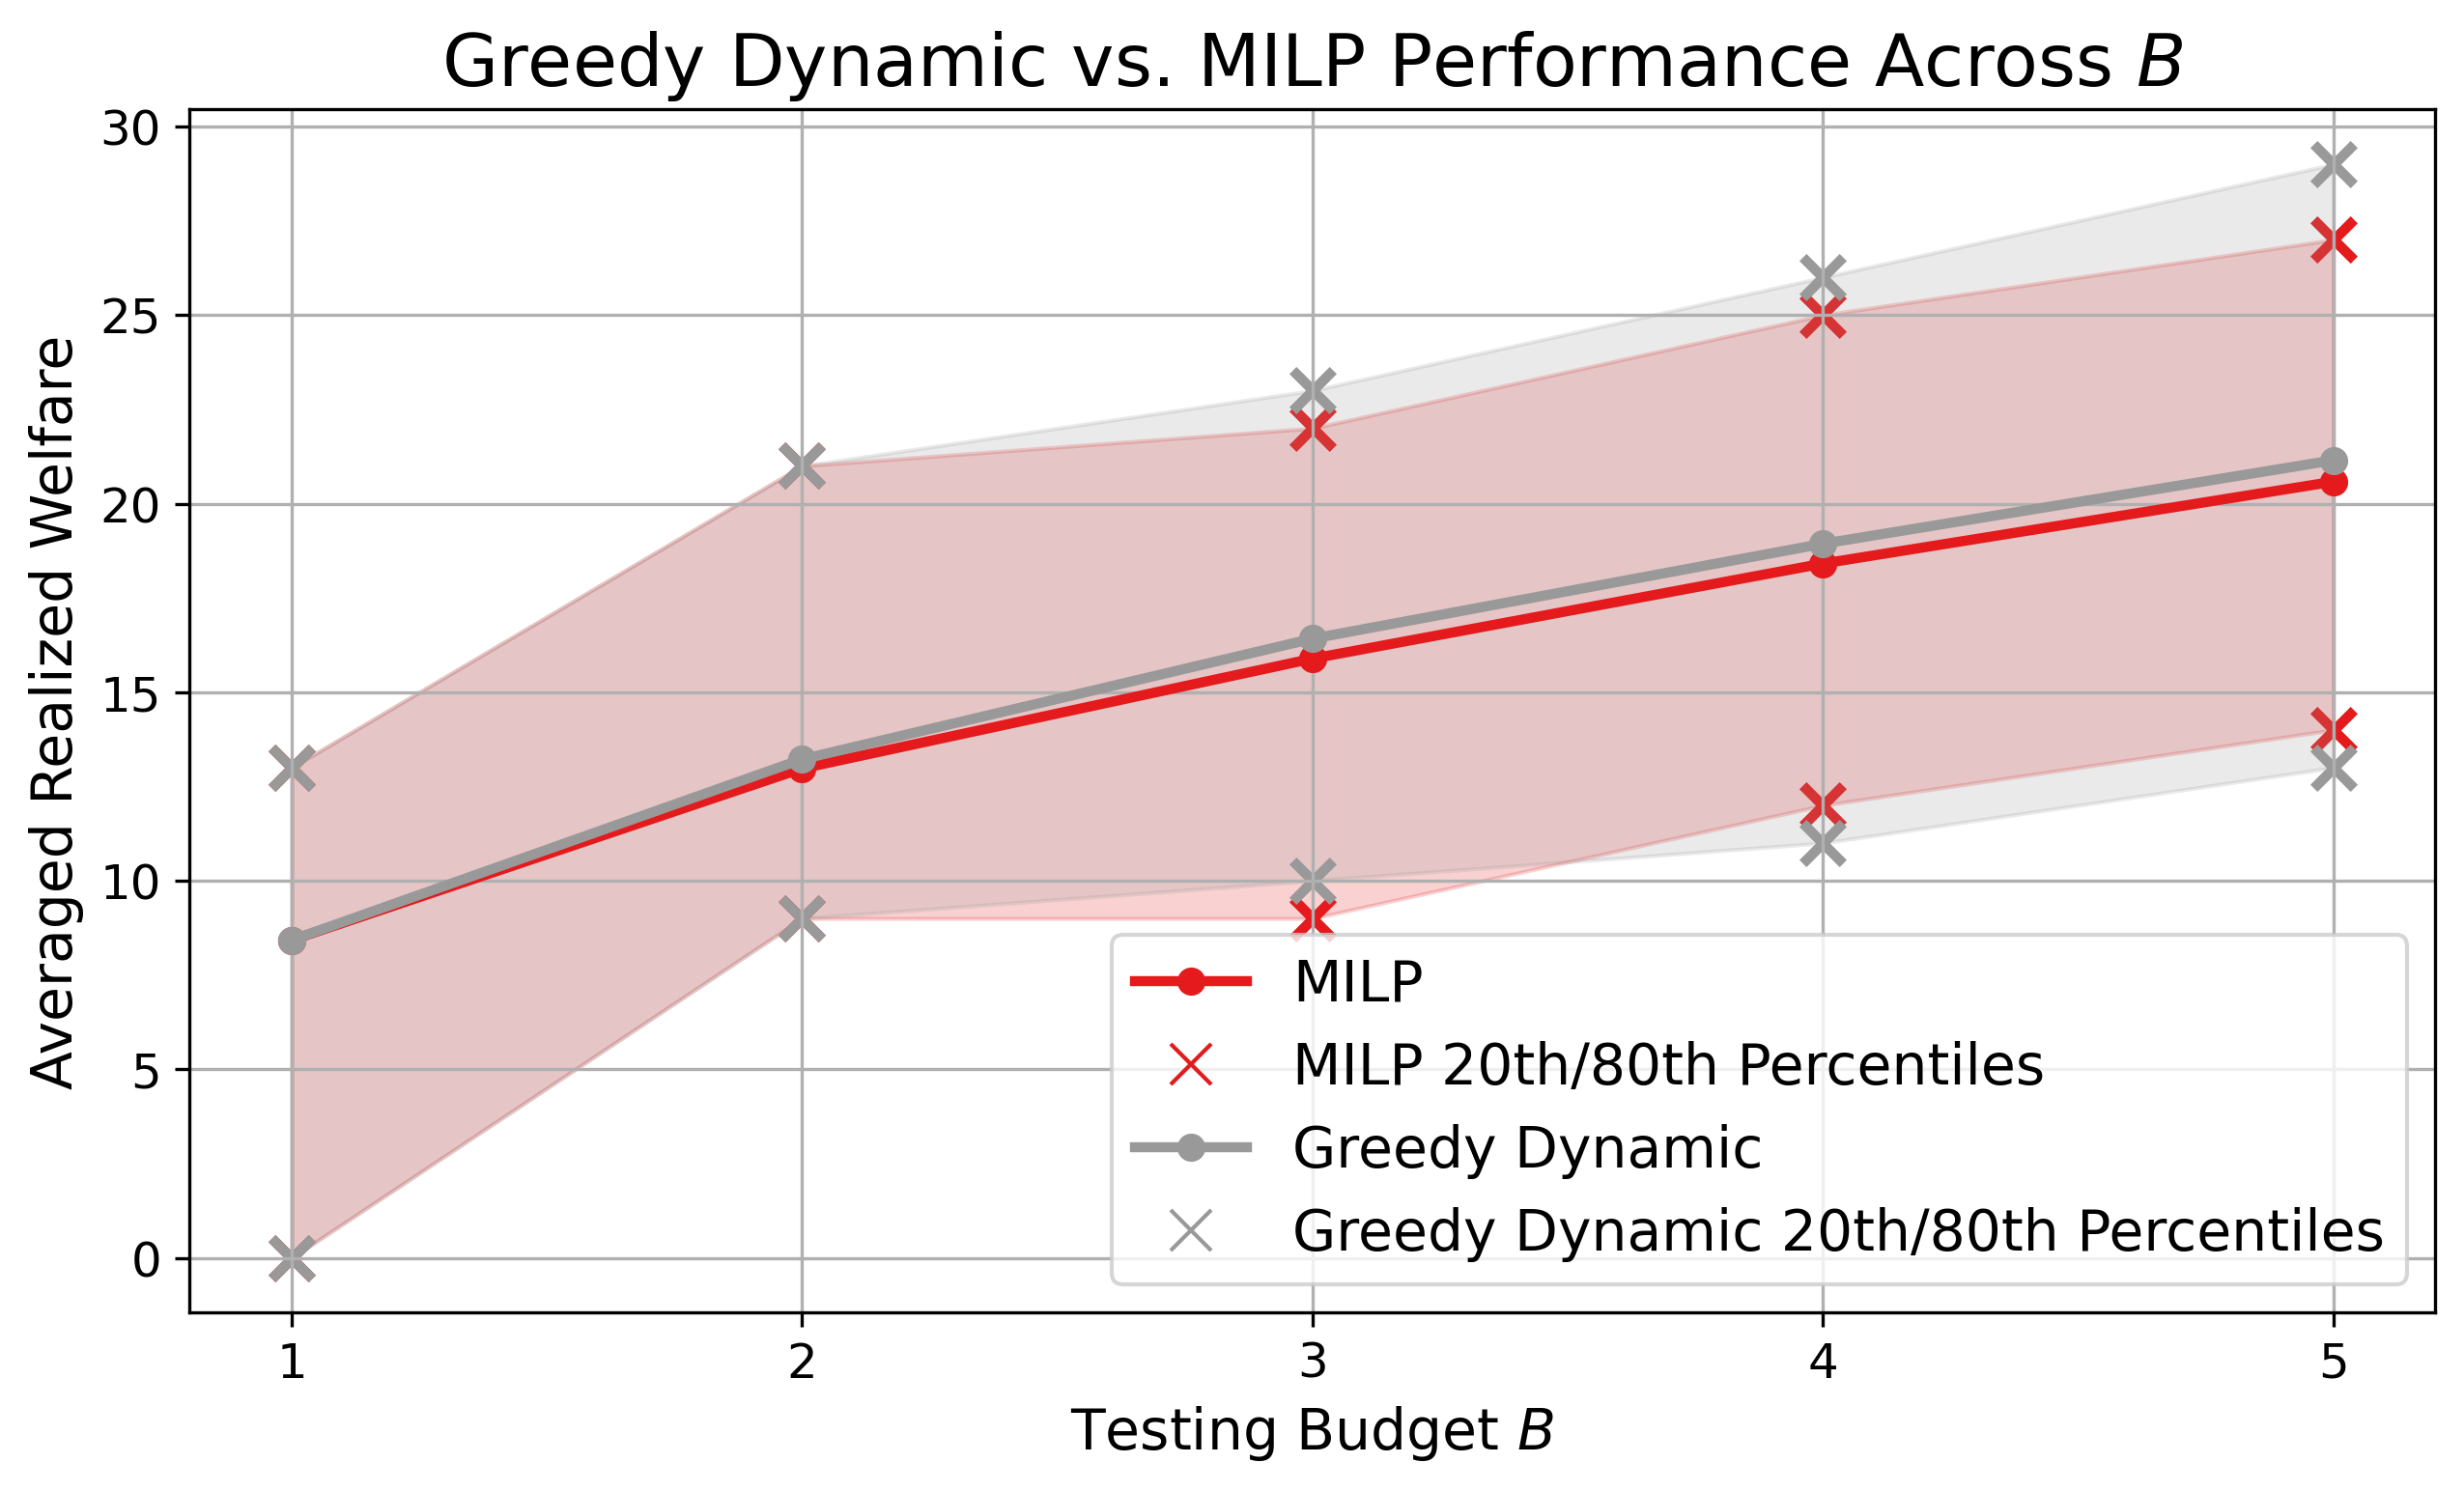

In [227]:
percentile_lower = 20  # Lower bound for cone
percentile_upper = 80  # Upper bound for cone

# Combine data
combined_df = pd.concat(dfs, ignore_index=True)

# Compute mean and percentiles
mean_df = combined_df.groupby("B")[columns_to_plot].mean()
percentile_lower_df = combined_df.groupby("B")[columns_to_plot].quantile(percentile_lower / 100)
percentile_upper_df = combined_df.groupby("B")[columns_to_plot].quantile(percentile_upper / 100)

# Plot results
plt.figure(figsize=(10, 5.5))
colors = plt.cm.get_cmap("Set1", len(columns_to_plot))

for idx, col in enumerate(columns_to_plot):
    color = colors(idx)  # Same color for each method

    # Plot central mean line
    plt.plot(mean_df.index, mean_df[col], marker='o', linestyle='-', color=color, label=col)

    # Fill between percentiles to create the "cone"
    plt.fill_between(mean_df.index, percentile_lower_df[col], percentile_upper_df[col], color=color, alpha=0.2)

    # Plot "X" markers for the percentiles
    plt.scatter(percentile_lower_df.index, percentile_lower_df[col], marker='x', color=color, s=100)
    plt.scatter(percentile_upper_df.index, percentile_upper_df[col], marker='x', color=color, s=100)

    # Add combined legend entry with a properly scaled "X" marker
    plt.plot([], [], marker='x', linestyle='', color=color, markersize=10, label=f"{col} {percentile_lower}th/{percentile_upper}th Percentiles")

# Ensure x-axis only contains integer values (B values)
plt.xticks(B_values)

plt.xlabel("Testing Budget $B$")
plt.ylabel("Averaged Realized Welfare")
plt.title("Greedy Dynamic vs. MILP Performance Across $B$")
plt.legend()
plt.grid()
plt.show()

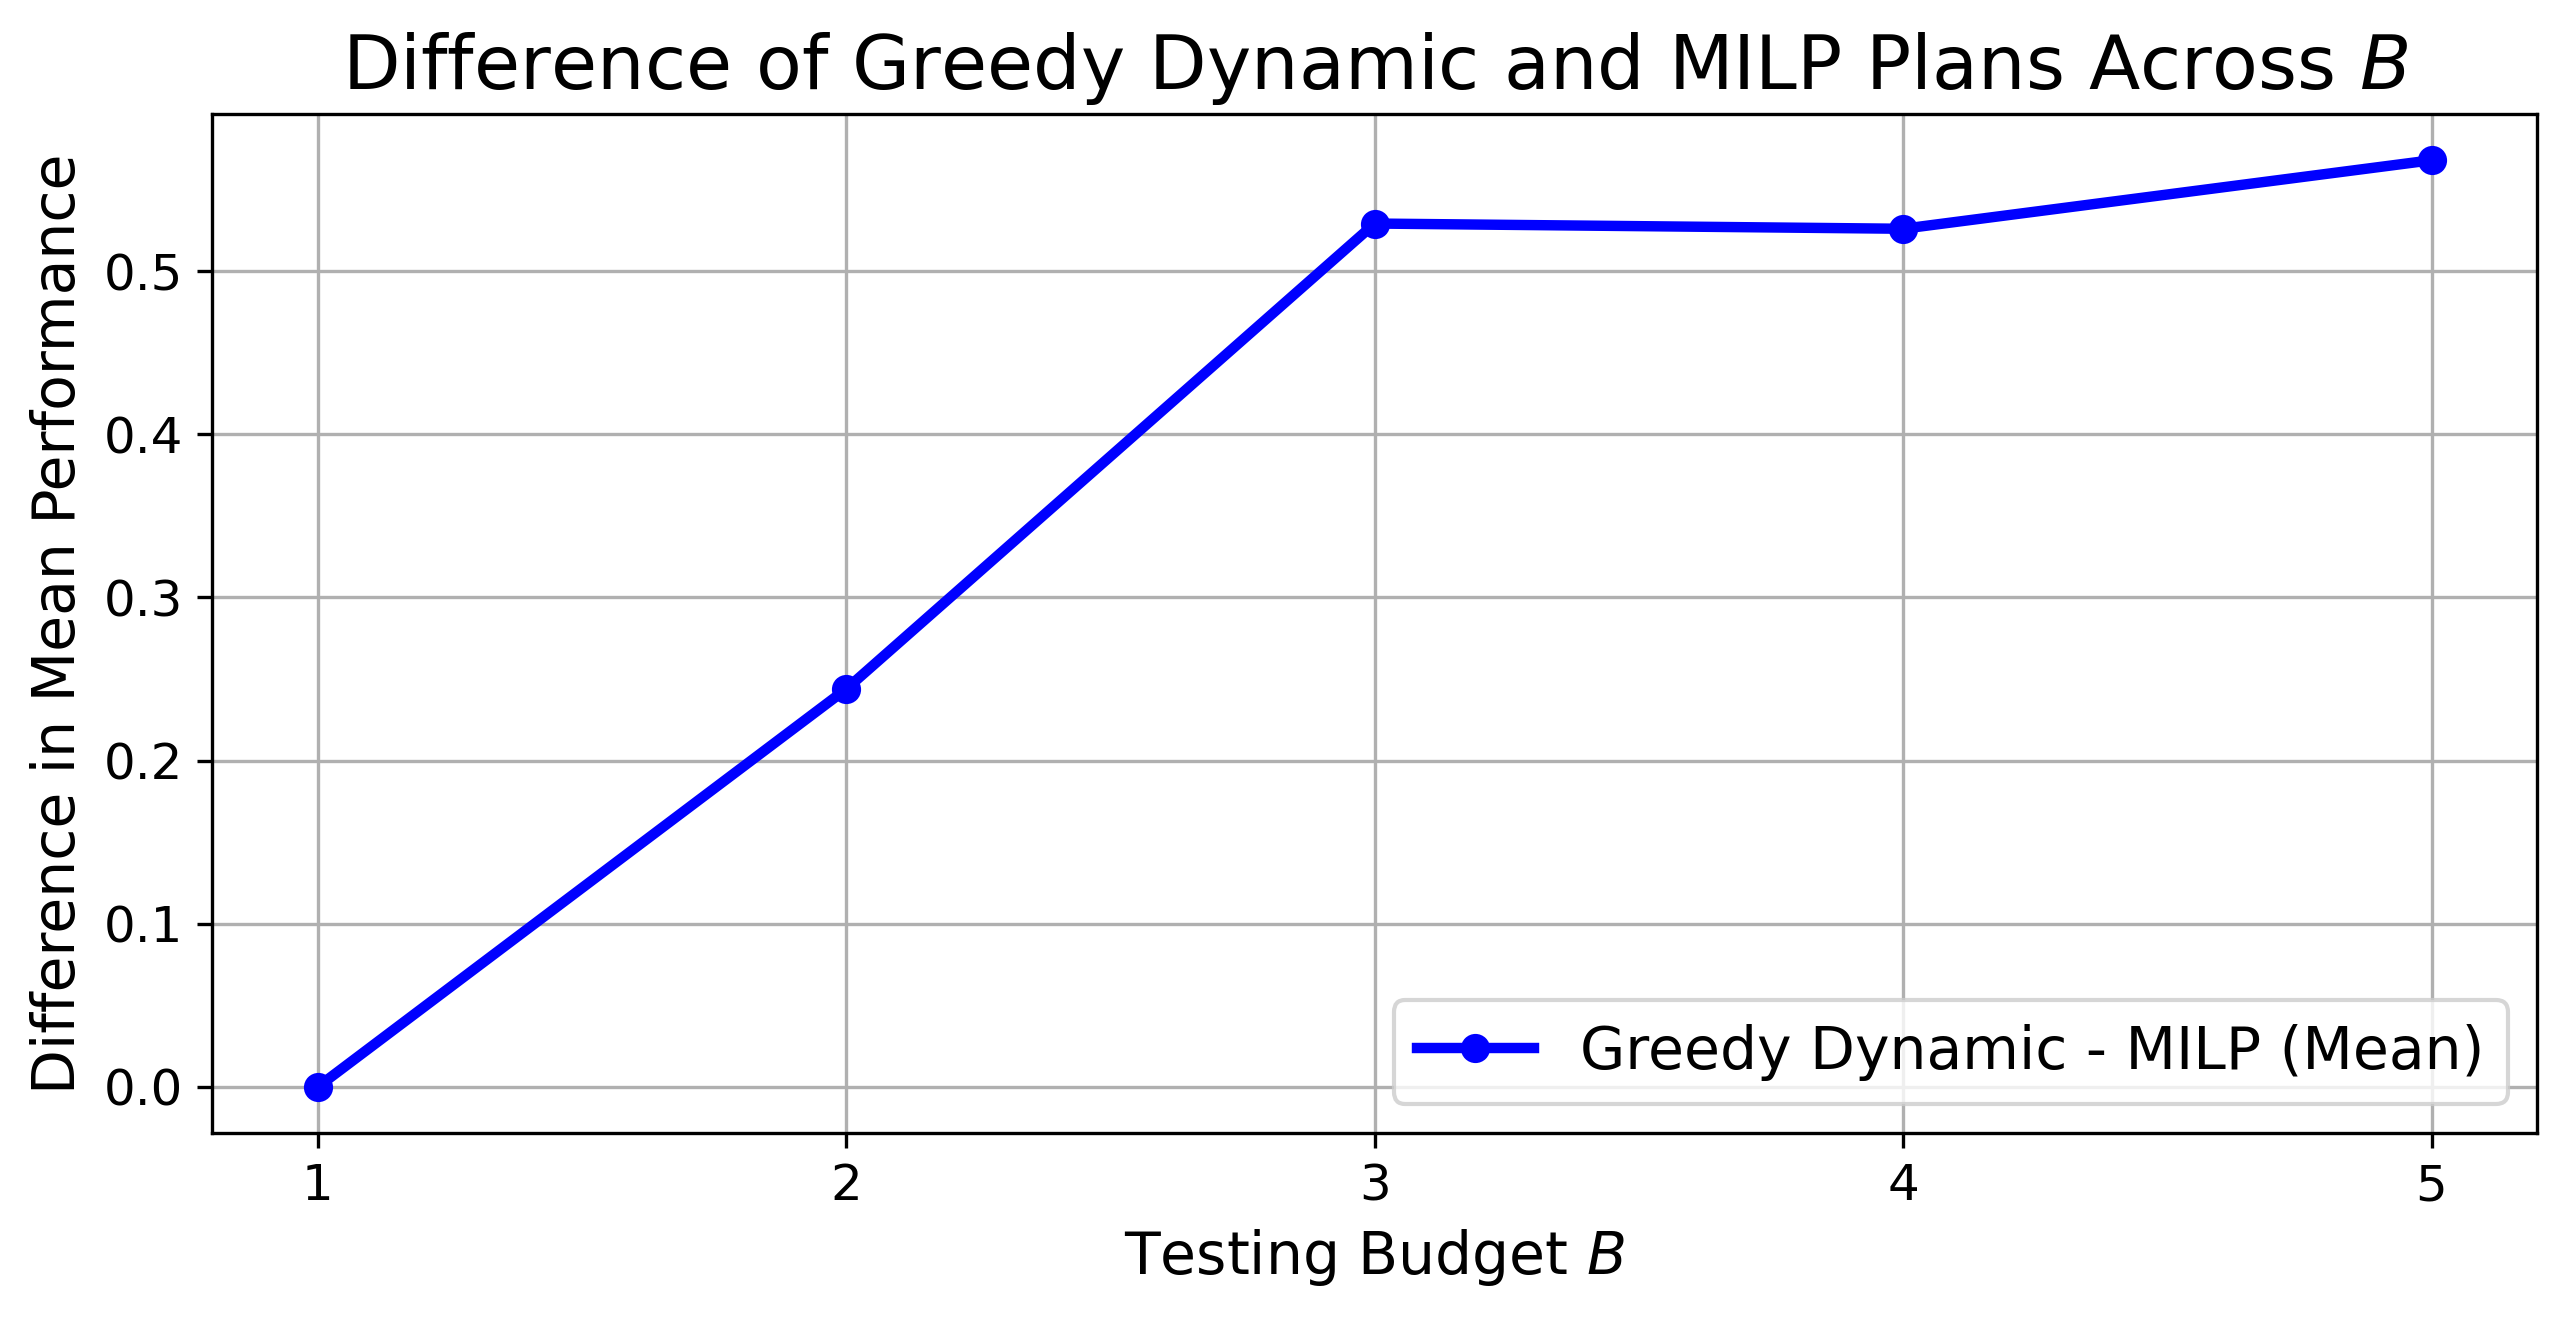

In [225]:
# Choose two columns to compare
col1 = "Greedy Dynamic"  # Change as needed
col2 = "MILP"  # Change as needed

use_mean = True  # Set to True for mean, False for percentiles
percentiles = []  # Percentiles to plot if use_mean=True or False

# Combine data
combined_df = pd.concat(dfs, ignore_index=True)

# Initialize figure
plt.figure(figsize=(10, 4.5))
colors = plt.cm.get_cmap("tab10", len(percentiles))  # Assign colors for percentiles

if use_mean:
    # Compute mean difference
    mean_df = combined_df.groupby("B")[[col1, col2]].mean()
    diff_mean = mean_df[col1] - mean_df[col2]

    # Plot mean difference
    plt.plot(diff_mean.index, diff_mean, marker='o', linestyle='-', color="blue", label=f"{col1} - {col2} (Mean)")

# Compute and plot percentile differences
percentile_dfs = {p: combined_df.groupby("B")[[col1, col2]].quantile(p / 100) for p in percentiles}
diff_percentiles = {p: percentile_dfs[p][col1] - percentile_dfs[p][col2] for p in percentiles}

for idx, p in enumerate(percentiles):
    color = colors(idx)
    plt.plot(diff_percentiles[p].index, diff_percentiles[p], marker='o', linestyle='--', color=color, label=f"{p}th percentile")

# Formatting
plt.xlabel("Testing Budget $B$")
plt.ylabel(f"Difference in Mean Performance")
plt.title(f"Difference of {col1} and {col2} Plans Across $B$")
plt.xticks(B_values)
plt.legend()
plt.grid()
plt.show()

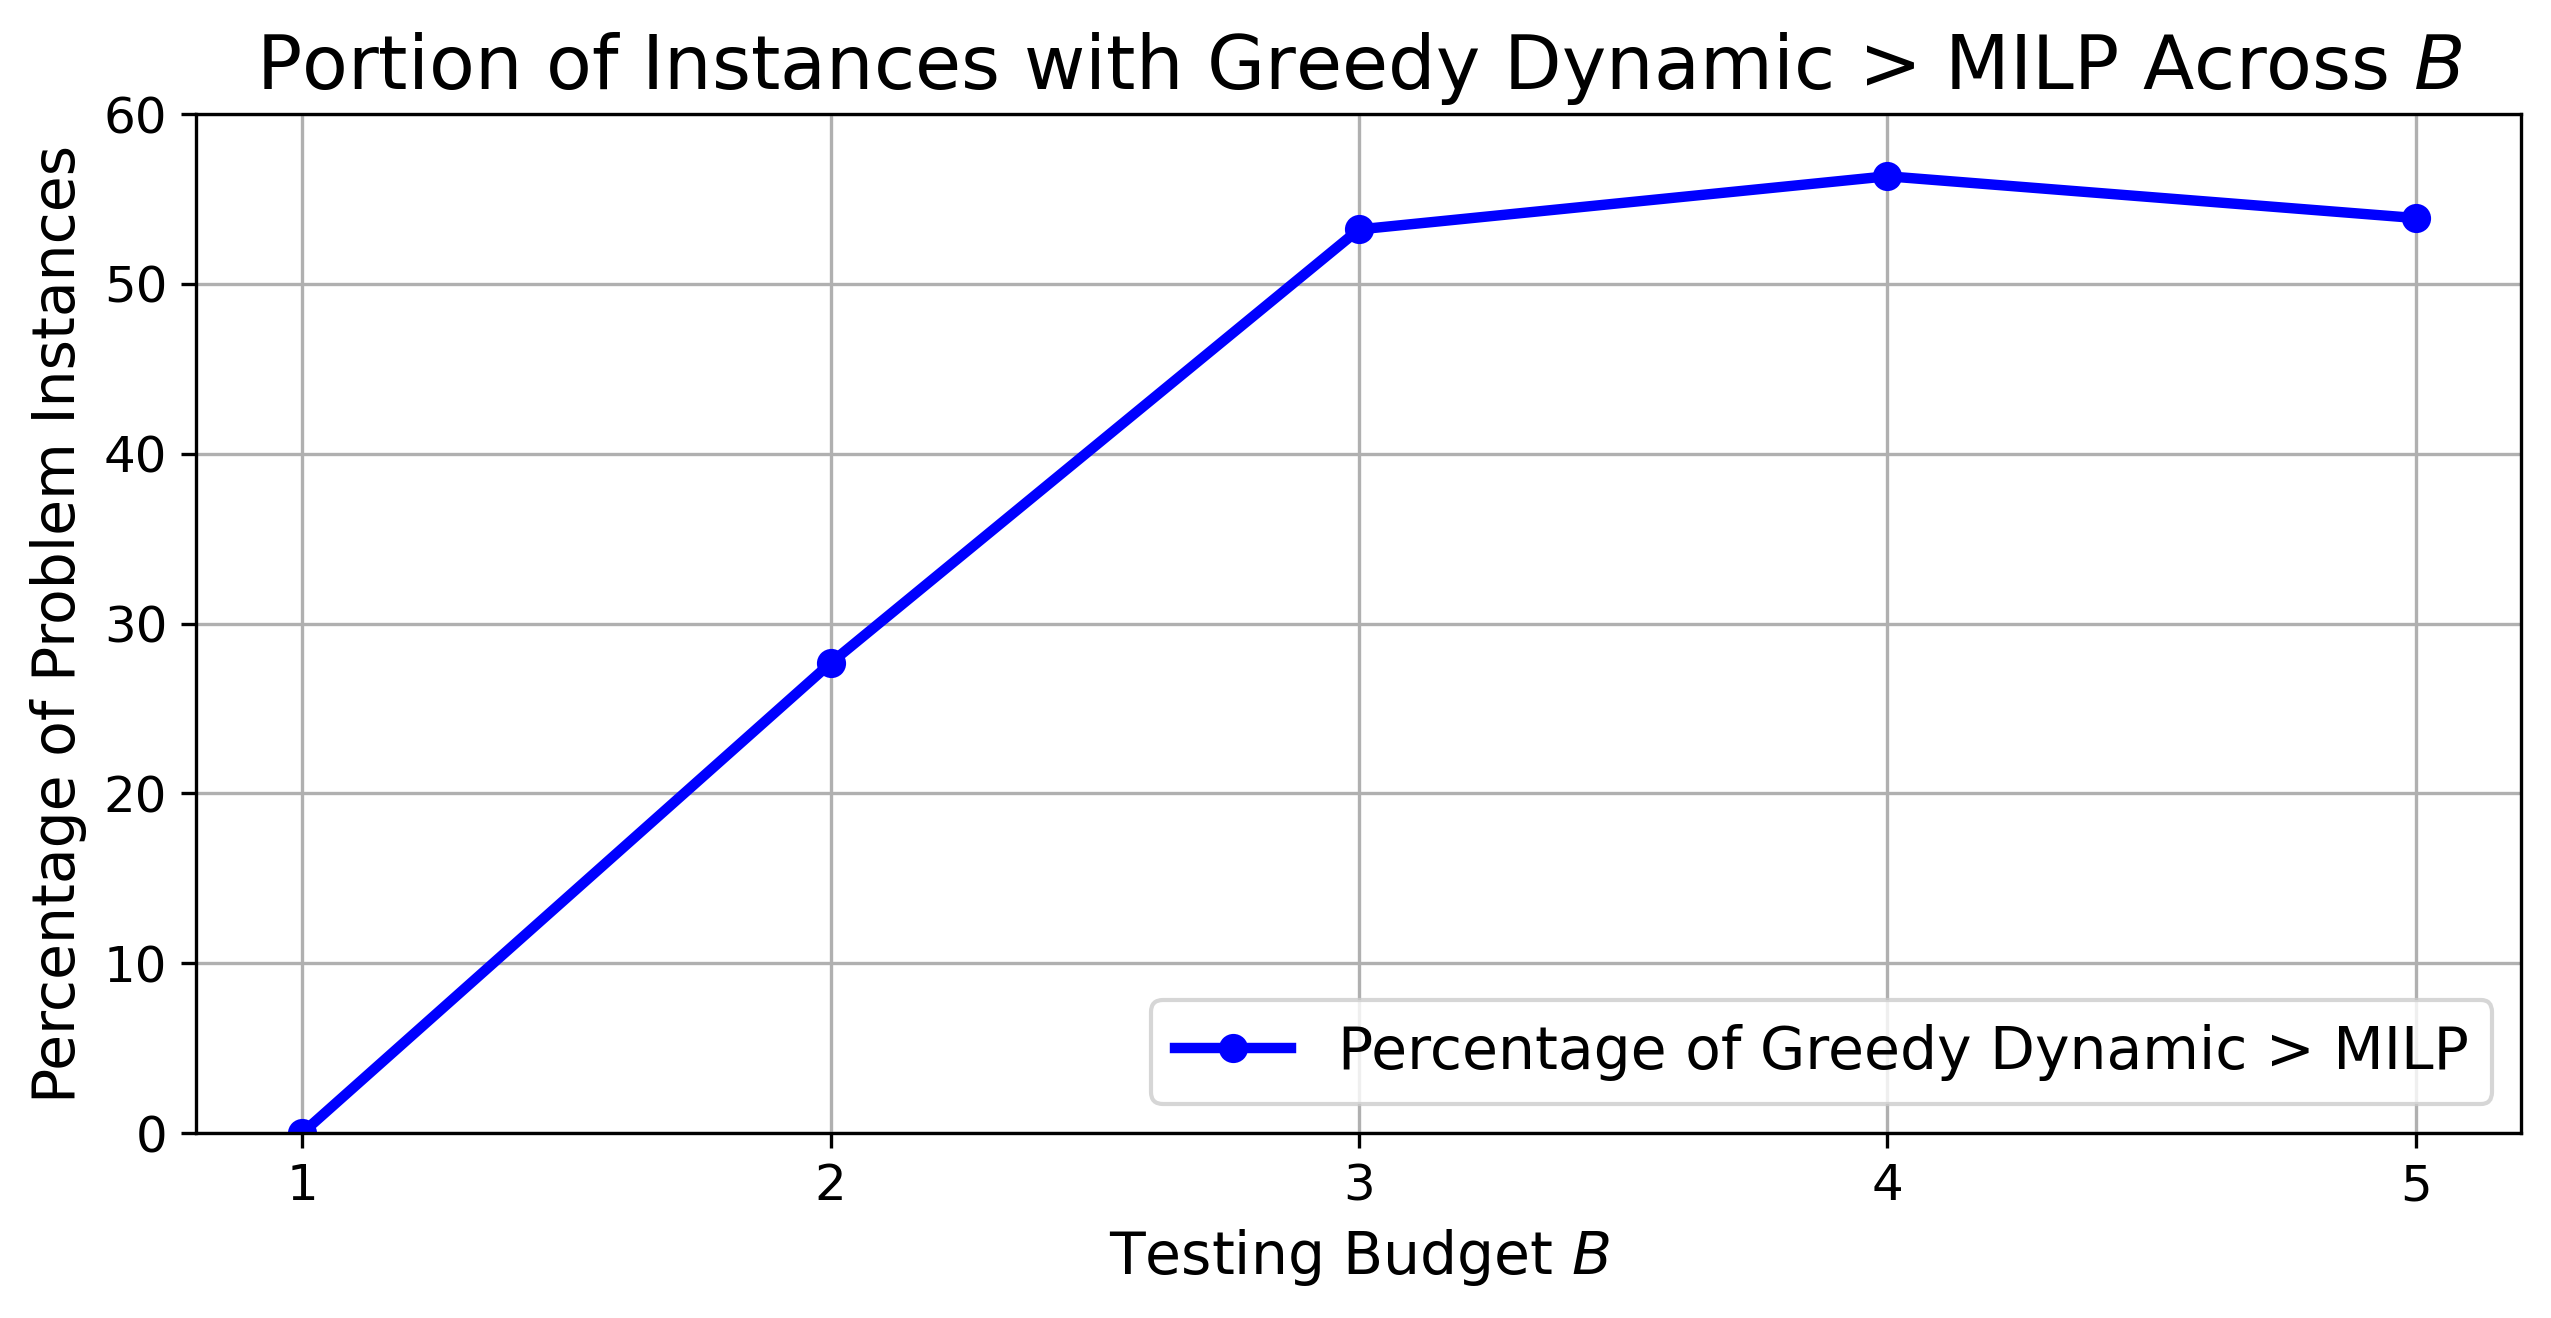

In [224]:
# Choose two algorithms to compare
col1 = "Greedy Dynamic"  # Change as needed
col2 = "MILP"  # Change as needed

# Combine data
combined_df = pd.concat(dfs, ignore_index=True)

# Compute the percentage of times col1 > col2 for each B
percentage_df = combined_df.groupby("B").apply(lambda x: (x[col1] > x[col2]).mean() * 100)

# Plot results
plt.figure(figsize=(10, 4.5))
plt.plot(percentage_df.index, percentage_df, marker='o', linestyle='-', color="blue", label=f"Percentage of {col1} > {col2}")

plt.xlabel("Testing Budget $B$")
plt.ylabel("Percentage of Problem Instances")
plt.title(f"Portion of Instances with {col1} > {col2} Across $B$")
plt.xticks(B_values)
plt.ylim(0, 60)
plt.legend()
plt.grid()
plt.show()
